# **DMI01 - Data Mining Studienarbeit David Meyer**
**Autor:** David Meyer
**Datum:** 2025-03 
**Version:** 1.0  
**Beschreibung:** In einem großen Wirtschaftsunternhemen wie IBM mit über 250.000 Mitarbeitern (statista, 2024 - https://de.statista.com/statistik/daten/studie/38591/umfrage/anzahl-der-mitarbeiter-von-ibm-seit-2000/), dessen Haupttätigkeiten die Softwareentwicklung sowie das Beratungsgeschäft sind, ist eine stabile Arbeitskraft über alle Abteilungen hinweg essentiell. Bei derart hohen Mitarbeiterzahlen sehen sich Unternehmen einerseits einer natürlichen Fluktiation ausgesetzt. Andererseits kann es auch Gründe außer der Reihe geben, welche zu Mitarbeiterabgängen führen. Neben ökonomischen bedingtem Personalabbau seitens des Unternehmens in schwierigen Zeiten gibt es auch in guten wirtschaftlichen Lagen Faktoren, die sich auf die Chance, einen Mitarbeiter zu halten oder zu verlieren, auswirken. Mithilfe von groß angelegten Mitarbeiterbefragungen und dessen Auswertung können Vorzeichen für einen Weggang erkannt und Mitarbeiterbindungsmaßnahmen eingeleitet werden. Ein erster und zentraler Bestandteil zur Lösung dieses betriebswirtschaftlichen Problems ist die Erkennung der bevorstehenden Kündigungen durch die Personalabteilung. Hierzu sollen Data Mining Verfahren eingesetzt werden. 
Dieses Notebook stellt die Frage, ob und welche Data Mining Verfahren mit welcher Genauigkeit in der Lage sind, Kündigungen richtig vorherzusagen. Als Basis für dieses Projekt dient der Human Resources Datensatz "ibm_attrition_dataset.csv". Der Datensatz stammt aus der öffentlichen Datenbank Kaggle (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) und wurde ursprünglich durch Data Scientisten der Firma IBM erstellt. Es handelt sich demnach um snythetische Daten. Das Notebook gliedert sich in die folgenden Schritte:

1. **Beschreibung der Variablen & der Meta-Daten.**
2. **Pre-Processing & Exploratory Data Analysis zur validierung der Verteilungsplausibilität verschiedener, zentraler Variablen.**
3. **Auswahl der anzuwendenden Modelle & Beschreibung.**
4. **Modellanwendung**
5. **Modellevaluation**

Um Data Mining Verfahren gezielt und strukturiert im Unternehmen einsetzen zu können, wurde der **CRISP-DM** (Cross-Industry Standard Process for Data-Mining) etabliert.
1. An erster Stelle steht das **Verständnis für das Geschäftsmodell**. Als Beratungs- und Entwicklungsunternehmen ist die Einhaltung der soll Mitarbeiterbestände essentiell. Daher müssen Kündigungen frühzeitig von der Personalabteilung erkannt und etwaige Gegenmaßnahmen eingeleitet werden können.  
2. Darauf folgt das **Datenverständnis**. Als Grundlage zur Erkennung von Kündigungen dienen Daten, die sowohl dmografische, als auch arbeitsplatzbezogene Merkmale, subjektive Merkmale wie Zufriedenheit, Daten zur Vergütung und Beobachtungen zum Fehlverhalten beinhalten. Dieses breite Spektrum an Merkmalen ermöglicht es, Evidenzen abzuleiten.
3. Die **Datenaufbereitung** erfolgt Hand in Hand mit der **Auswahl des anzuwendenden Modells**. Grundsätzlich muss zuvor aber, gerade bei synthetischen Datensätzen, die **Plausibilität und validität** sowie die Vollständigkeit der einzelnen Daten geprüft und wenn nötig angepasst werden. 
4. Nach der **Modellierung** folgt die **Evaluation des Modells**. Wird mithilfe des trainierten Modells das betriebswirtschaftliche Problem voraussichtlich gelöst (Können Kündigungen erkannt werden und Mitarbeiter auch durch Bindungsmaßnahmen gehalten werden), wird das Modell in Kombination mit Mitarbeiterbefragungen in diesem Fall auf regelmäßiger Basis eingesetzt. Andernfalls geht der Prozess in die nächste Iteration.

Eine ausführliche Dokumentation für dieses Projekt ist unter ../docs/Meyer-David_DMI01_Studienarbeit.pdf zu finden.

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import ProfileReport

# Einlesen der Rohdaten
df_raw = pd.read_csv("../src/ibm_attrition_dataset.csv")

# Profiling Report erstellen - Auskommentiert nach Erstellung
# profile = ProfileReport(df_raw, title="IBM Attrition Dataset", explorative=True)
# profile.to_file("../docs/ibm_attrition_dataset_profile.html")

# **Beschreibung der Variablen**
Der Datensatz wird hierfür in kategoriale und numerische Variablen getrennt. Der Profiling-Report ist unter ../docs/ibm_attrition_dataset_profile.html zu finden.

In [16]:
# Deskriptive Statistik für numerische Variablen ausgeben
df_raw.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000


In [17]:
# Nur nicht-numerische Spalten auswählen
df_raw.select_dtypes(exclude=['number']).head()

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Higher_Education,Date_of_Hire,Mode_of_work,Work_accident,Source_of_Hire,Job_mode
0,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,Single,Yes,Graduation,21-01-2021,OFFICE,No,Job Event,Contract
1,No,Travel_Rarely,Research & Development,Male,Research Scientist,Single,No,Graduation,13-03-2021,WFH,No,Recruiter,Part Time
2,No,Travel_Rarely,Research & Development,Male,Research Director,Married,Yes,Post-Graduation,23-01-2021,WFH,No,Job Event,Contract
3,No,Travel_Rarely,Sales,Male,Sales Representative,Divorced,No,PHD,25-04-2021,OFFICE,Yes,Recruiter,FullTime
4,No,Travel_Rarely,Research & Development,Female,Laboratory Technician,Single,No,PHD,14-06-2021,WFH,No,Job Event,Contract



## **Struktur des Datensatzes**
- **Anzahl der Zeilen:** 1470
- **Anzahl der Spalten:** 31 (18 numerische, 13 kategoriale)

## **Spaltenübersicht**
- **Demografische Merkmale:**
  - `Age`: Alter des Mitarbeiters
  - `Gender`: Geschlecht (Male/Female)
  - `MaritalStatus`: Familienstand

- **Arbeitsplatz- und Jobbezogene Merkmale:**
  - `JobLevel`: Karrierestufe
  - `JobRole`: Spezifische Position
  - `Department`: Abteilung (Sales, Research & Development, HR)
  - `BusinessTravel`: Reisetätigkeit (Rarely, Frequently, None)
  - `Mode_of_work`: Arbeitsmodus (Office, WFH - Work from home)
  - `NumCompaniesWorked`: Anzahl an Firmen, wo der/die Mitarbeiter/in zuvor gearbeitet hat
  - `YearsAtCompany`: Jahre im Unternehmen
  - `YearsWithCurrManager`: Jahre mit aktuellem Vorgesetzten
  - `JobSatisfaction`: Jobzufriedenheit (1-4)
  - `JobInvolvement`: Arbeitsengagement (1-4)
  - `YearsSinceLastPromotion`: Anzahl Jahre seit der letzten Beförderung
  - `OverTime`: Leistet der Mitarbeiter Überstunden oder nicht
  - `Job_mode`: Beschäftigungsart (Fulltime/Contract/Part Time)
  
- **Vergütung & Performance:**
  - `MonthlyIncome`: Monatliches Einkommen
  - `PercentSalaryHike`: Letzte Gehaltserhöhung in Prozent
  - `StockOptionLevel`: Aktienoptionslevel
  - `PerformanceRating`: Mitarbeiterbewertung (3-4)
  
- **Mitarbeiterfluktuation:**
  - `Attrition`: Ob der Mitarbeiter das Unternehmen verlassen hat (Yes/No)
  - `Date_of_Hire`: Startdatum des Beschäftigungsverhältnisses
  - `Date_of_termination`: Beendigungsdatum (nur NA-Werte vorhanden)
  - `Source_of_Hire` Rekrutierungskanal des Mitarbeiters (Recruiter/Job Event/Walk-in/Job Portal).
  
  
- **Zusätzliche Faktoren:**
  - `Work_accident`: Gab es einen Arbeitsunfall (Yes/No)
  - `Leaves`: Keine gesicherte Interpretierbarkeit
  - `Absenteeism`: Ordinalskalierte Daten, die Aussagekraft über die Abwesenheit von Mitarbeitern haben.
  - `DistanceFromHome`: Entfernung zum Arbeitsplatz in Kilometern
  - `TotalWorkingYears`: Anzahl der insgesamt in der Karriere gearbeiteten Jahre
  - `TrainingTimesLastYear`: Anzahl der Teilnahmen an Schulungen im letzten Jahr
  - `Higher_Education`: Höchster Bildungsabschluss des Mitarbeiters

## **Datenqualität**
- Keine fehlenden Werte außer in der Spalte `Date_of_termination`.
- `Date_of_termination` enthält ausschließlich fehlende Werte und wird entfernt.
- Aufgrund des Fehlens der Information, zu welchem Zeitpunkt der Datensatz die Daten simuliert, wird die Spalte `Date_of_Hire` ebenfalls entfernt. Auch kann aufgrund des Fehlens der `Date_of_termination` Werte die Länge eines terminierten Arbeitsverhältnisses nicht ermittelt werden. 

# **Pre-processing**

In [18]:

# Entferne nicht benötigte Spalten & Abspeichern in einen DataFrame, mit für die EDA & das Modelling gearbeitet wird.
df = df_raw.copy().drop(columns=["Date_of_termination", "Date_of_termination", "Date_of_Hire"])
# Umwandlung von "Yes" und "No" in 1 und 0 bzw. einen Boolean Wert
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0}).astype(bool)


# **EDA**

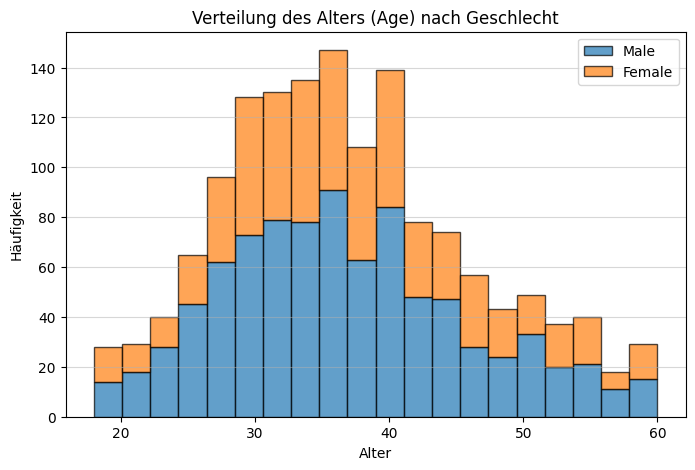

In [19]:
plt.figure(figsize=(8, 5))

# Daten nach Geschlecht aufteilen
male_ages = df[df["Gender"] == "Male"]["Age"]
female_ages = df[df["Gender"] == "Female"]["Age"]

# Histogramm mit Stacking
plt.hist([male_ages, female_ages], bins=20, edgecolor='black', alpha=0.7, label=["Male", "Female"], stacked=True)

# Titel und Achsenbeschriftungen
plt.title("Verteilung des Alters (Age) nach Geschlecht")
plt.xlabel("Alter")
plt.ylabel("Häufigkeit")
plt.legend()
plt.grid(axis='y', alpha=0.5)

# Plot anzeigen
plt.show()

In [20]:
# Berechnung der absoluten und prozentualen Verteilung von Gender je JobRole
jobrole_gender_counts = df.groupby("JobRole")["Gender"].value_counts().unstack()
jobrole_gender_percent = df.groupby("JobRole")["Gender"].value_counts(normalize=True).unstack() * 100

# Erstellung eines DataFrames für Übersicht
jobrole_gender_df = pd.DataFrame({
    "Männlich (Absolut)": jobrole_gender_counts["Male"].round(1),
    "Weiblich (Absolut)": jobrole_gender_counts["Female"].round(1),
    "Männlich (%)": jobrole_gender_percent["Male"].round(1),
    "Weiblich (%)": jobrole_gender_percent["Female"].round(1)
}).fillna(0)

# Berechnen der absoluten und prozentualen Verte ohne Job
gender_counts = df["Gender"].value_counts()
gender_percent = df["Gender"].value_counts(normalize=True) * 100

# Erstellung eines DataFrame für Übersicht
gender_df = pd.DataFrame({
    "Absolute Häufigkeit": gender_counts,
    "Prozentualer Anteil (%)": gender_percent
})

jobrole_gender_df

,Männlich (Absolut),Weiblich (Absolut),Männlich (%),Weiblich (%)
JobRole,,,,
Healthcare Representative,80,51,61.1,38.9
Human Resources,36,16,69.2,30.8
Laboratory Technician,174,85,67.2,32.8
Manager,55,47,53.9,46.1
Manufacturing Director,73,72,50.3,49.7
Research Director,47,33,58.8,41.2
Research Scientist,178,114,61.0,39.0
Sales Executive,194,132,59.5,40.5
Sales Representative,45,38,54.2,45.8


Es ist eine leichte überrepräsentierung von Männern (60%) in der Firma zu verzeichnen. Da IBM eine Unternehmung im Bereich IT ist, ist die Überrepräsentierung von Männern plausibel. In IT-Unternehmen ist nachwievor eine beträchtliche Geschlechter Lücke zu verzeichnen. So sind in den großen Tech Unternehmen Facebook, Amazon, Apple, Google & Microsoft nur zwischen 29% und 45% der Beschäftigten Personen Frauen. Insgesamt sind nur 42% der arbeitenden Bevölkerung Frauen (womentech, 2025 - https://www.womentech.net/women-in-tech-stats). Die Altersverteilung insgesamt scheint ebenfalls größtenteils plausibel. So sind nur Menschen im Alter von 18 bis 60 Jahren enthalten. Die bei einem Renteneintrittsalter höchste anzunehmende Altersgruppe von 60-65 Jahren ist nicht vertreten.

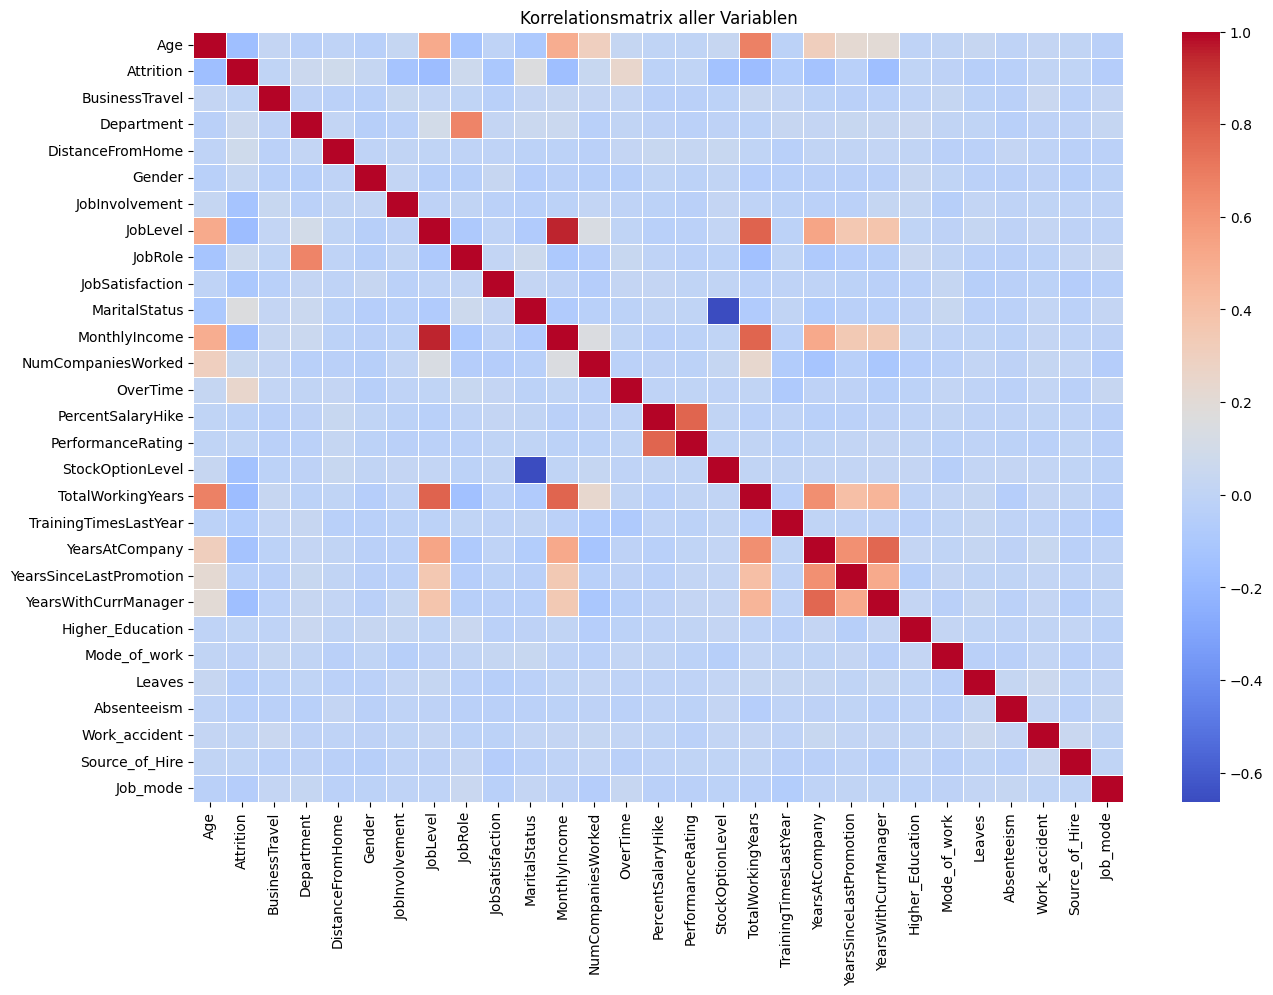

In [21]:

# Umwandlung kategorialer Variablen in numerische Werte für die Korrelationsmatrix
df_encoded = df.copy()

# Kategorische Spalten in numerische Werte umwandeln (Label Encoding) - nur für die Korrelationsmatrix schnell und einfach. Hier wird nicht auf ordinalität oder nominalität geachtet.
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Korrelation berechnen
corr_matrix_full = df_encoded.corr()

# Visualisierung der vollständigen Korrelationsmatrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_full, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Korrelationsmatrix aller Variablen")
plt.show()


Die Zielvariable Attrition korreliert mit Faktoren wie Überstunden, Zeit seit der letzten Beförderung, den Arbeitsjahren beim Unternehmen, den Arbeitsjahren insgesamt, dem Verdienst (Einkommen & Aktienoptionen) - welcher sehr stark mit dem Joblevel korreliert und zuletzt auch mit der Zufriedenheit und dem Engagement im Job. Beispielsweise ältere Mitarbeiter haben qua ihres Alters eine höhere Chance sich aus dem Arbeitsleben zu verabschieden. Andere Variablen wie Geschlecht scheinen einen nicht so großen Einfluss auf die Kündigungsentscheidung zu haben. Die Korrelationen zwischen anderen Variablen wie `PerformanceRating` & `PercentSalaryHike` wirken ebenfalls plausibel. Mit höherer Performance wächst die Chance auf höhere Gehaltserhöhungen. Dies ist ein gängiger Mechanismus in Leistungsorientierten Wirtschaftsunternehmen. Die Korrelationen sind somit insgesamt erwartungsgerecht.

## **Plotting der Verteilungen von mit der Zielvariable korrelierenden Variablen**


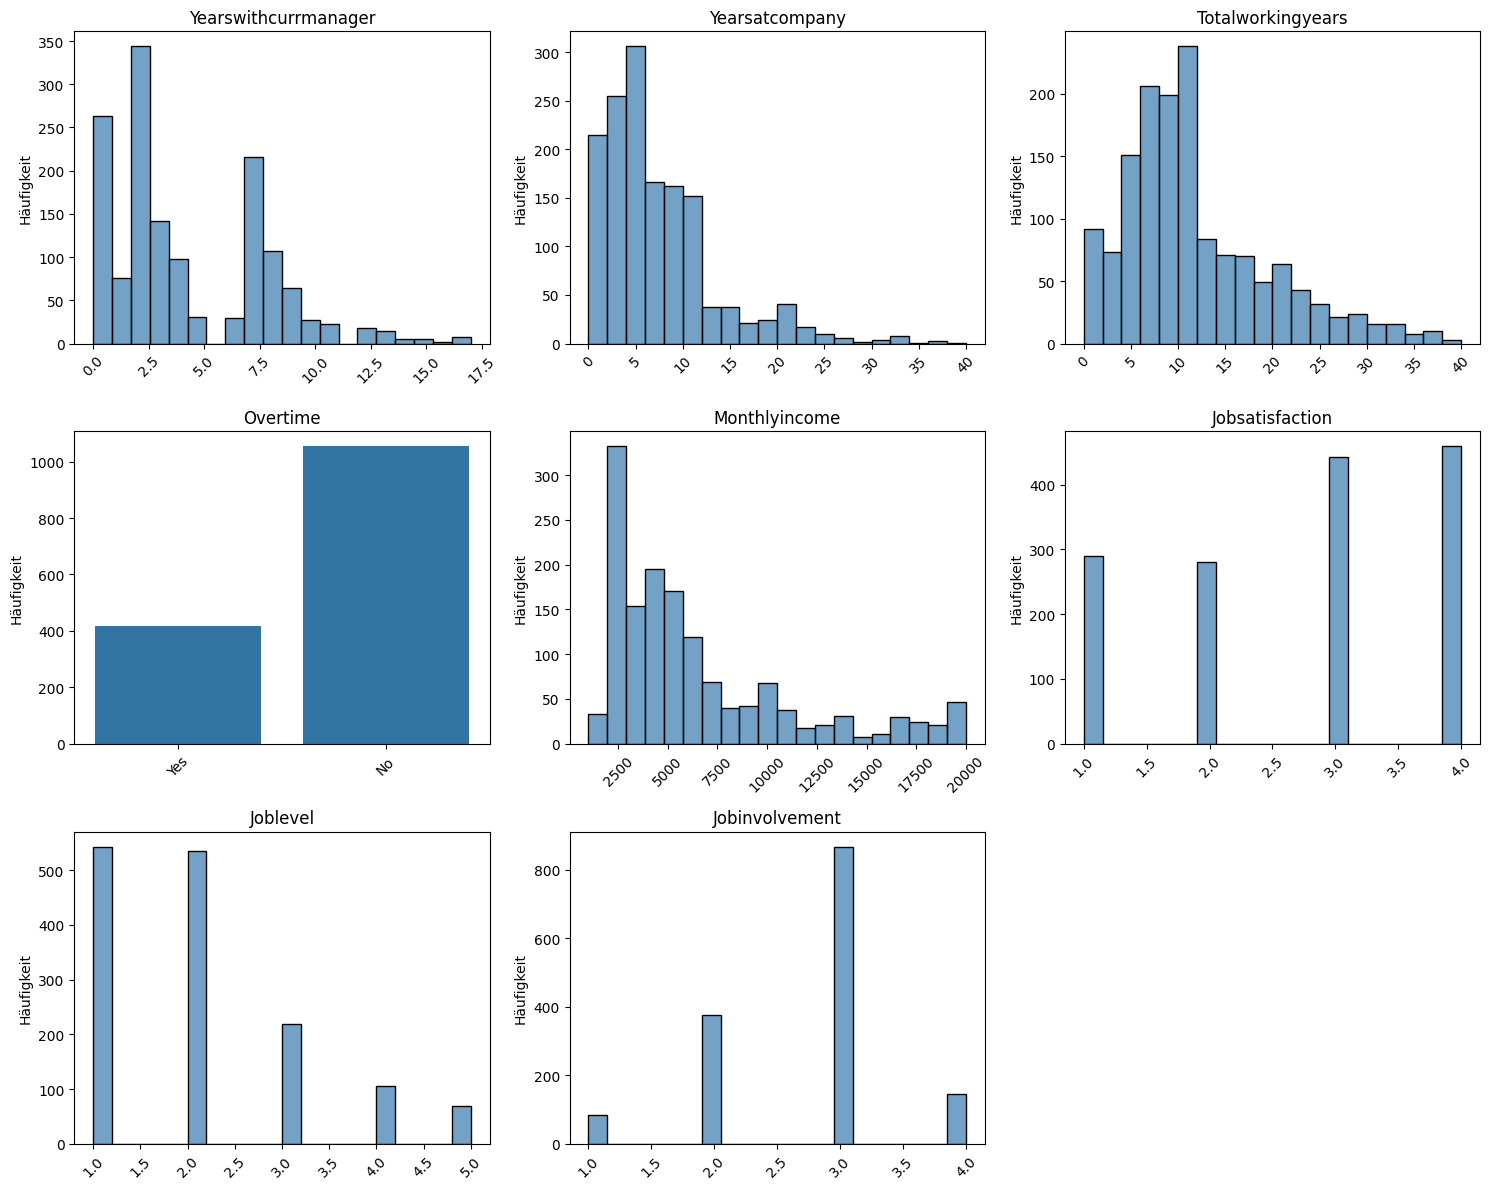

In [22]:
# Liste der zu plottenden Variablen
variables = [
    "YearsWithCurrManager", "YearsAtCompany", "TotalWorkingYears", 
    "OverTime", "MonthlyIncome", "JobSatisfaction", "JobLevel", "JobInvolvement"
]

# Subplot-Einstellungen
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plots für jede Variable
for i, var in enumerate(variables):
    if var in df.columns:
        if df[var].dtype == 'object':
            sns.countplot(x=df[var], ax=axes[i])
        else:
            sns.histplot(df[var].dropna(), bins=20, ax=axes[i], color='steelblue')
        
        axes[i].set_title(var.replace("_", " ").title())
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Häufigkeit")
        axes[i].tick_params(axis='x', rotation=45)

# Entfernen überflüssiger Subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Layout anpassen
plt.tight_layout()
plt.show()

In [23]:
# Anzahl Kündigungen
df["Attrition"].value_counts(normalize=True) * 100

Attrition
False    83.877551
True     16.122449
Name: proportion, dtype: float64

# **Modellauswahl**

Bei der Zielvariable `Attrition` handelt es sich um eine binäre Klassifikationsaufgabe, da ein Mitarbeiter entweder kündigt oder nicht. Daher wird die Auswahl der Modelle auf die Supervised ML-Methoden für Klassifizierung eingeschränkt. Um einen Vergleich zwischen verschiedenen Modellen ziehen zu können, werden zwei klassische Modelle, die auf Ensembles von Entscheidungsbäumen basieren, herangezogen. Ensemble-Modelle haben den Vorteil, durch Regularisierung Overfitting zu vermeiden.

### **1. Random Forest**
Random Forest ist ein **Ensemble-Modell**, das viele **unabhängige Entscheidungsbäume parallel trainiert** und für die Klassifizierung einen **Mehrheitsentscheid** trifft (das häufigste Binärergebnis gewinnt). Jeder Baum erhält eine zufällige **Teilmenge der Trainingsdaten** (Bagging) und verwendet nur eine zufällige Auswahl an Features pro Split (`max_features`). Dadurch wird sichergestellt, dass nicht alle Bäume dieselben Muster lernen und die Gesamtvorhersage robuster wird.

Obwohl Random Forest **robust gegen Overfitting** ist, können sehr tiefe Bäume oder zu viele Bäume die Berechnung verlangsamen. Um Overfitting zu vermeiden, nutzt Random Forest verschiedene **Regularisierungsmechanismen**:

- **Begrenzung der Baumtiefe (`max_depth`)**: Legt fest, wie tief ein einzelner Entscheidungsbaum wachsen darf, um zu verhindern, dass das Modell zu stark an das Training angepasst wird.
- **Minimale Anzahl an Beobachtungen pro Split (`min_samples_split`)**: Erfordert, dass mindestens eine bestimmte Anzahl von Datenpunkten vorhanden ist, bevor ein Split durchgeführt wird.
- **Minimale Anzahl von Beobachtungen pro Blatt (`min_samples_leaf`)**: Verhindert, dass Blätter mit sehr wenigen Datenpunkten entstehen, die das Modell zu sehr auf das Training spezialisieren.
- **Begrenzung der Anzahl der Features pro Split (`max_features`)**: Wählt zufällig eine Teilmenge der Features für jeden Split, sodass nicht immer die stärksten Prädiktoren dominieren.
- **Anzahl der Bäume (`n_estimators`)**: Eine höhere Anzahl von Bäumen führt zu stabileren Vorhersagen, kann aber die Rechenzeit erhöhen.

Durch diese Mechanismen bleibt Random Forest ein **starkes, interpretierbares Modell**, das gut mit nicht-linearen Daten umgehen kann.

### **Feature Engineering für Random Forest**
Random Forest benötigt **nur begrenztes Feature Engineering**, da es **automatisch die wichtigsten Features auswählt und keine Skalierung erfordert**. Dennoch sind einige Vorverarbeitungsschritte notwendig:

1. **Umgang mit fehlenden Werten**:
   - Random Forest **kann mit fehlenden Werten umgehen**, aber es ist ratsam, diese zu **imputieren**.
   - **Numerische Werte** → Median- oder Mittelwert-Imputation.
   - **Kategorische Werte** → Modus (häufigster Wert) oder eigene Kategorie `Missing`.

2. **Kategoriale Variablen in numerische Werte umwandeln**:
   - Random Forest kann **nicht direkt mit kategorialen Variablen** arbeiten.
   - **Label Encoding** für Variablen mit einer natürlichen Reihenfolge (z. B. Bildungsniveau).
   - **One-Hot-Encoding** für nominale Variablen ohne Reihenfolge (z. B. Abteilung, Jobrolle).
   

### 2. **XGBoost:**
Dabei handelt es sich ebenfalls um ein Ensemble-Modell, welches jedoch nicht unabhängige Bäume parallel, sondern sequenziell und aufeinander aufbauend erstellt. Nach jedem Baum wird die Differenz zwischen der tatsächlichen Zielvariable im Trainingsdatensatz und der Vorhersage berechnet (Residuum). Da `Attrition` binär ist, kann die Vorhersage nicht direkt mit dem echten Wert verglichen werden, wie es bei einer Regression der Fall wäre. Stattdessen wird eine wahrscheinlichkeitsbasierte Fehlerfunktion (Binary Cross-Entropy, Log Loss) genutzt, um die Wahrscheinlichkeit für beide Klassen vorherzusagen. 
Je näher die vorhergesagte Wahrscheinlichkeit bei der Wahrheit liegt, desto geringer ist der Fehler. Der nächste Baum wird daraufhin trainiert, diesen Fehler zu minimieren, indem er das Residuum reduziert. Dabei gibt der Gradient (erste Ableitung der Verlustfunktion) an, in welche Richtung das Modell die Vorhersagen anpassen sollte. Im Fall von Log Loss entspricht der Gradient tatsächlich dem Residuum. Durch das Gradient Boosting kann die Vorhersagegenauigkeit stark erhöht werden, was jedoch die Gefahr von Overfitting birgt. Um dies zu vermeiden, werden beim Hyperparameter-Tuning verschiedene Faktoren optimiert, darunter:
- **Wie viele Bäume erstellt werden (n_estimators),**
- **Wie tief die Bäume maximal sein sollen (max_depth) und**
- **Wie hoch die Lernrate α (learning_rate) sein soll.**

Die Lernrate α gibt an, wie stark der Fehler des vorherigen Baums korrigiert werden soll. Sie skaliert den Beitrag jedes neuen Baums zur Gesamtvorhersage. Beispielsweise würde eine learning_rate von 0.1 bedeuten, dass jede Iteration nur zu 10% in die Gesamtvorhersage eingeht, wodurch Overfitting reduziert wird. Eine zu hohe Lernrate kann dazu führen, dass das Modell zu aggressiv lernt und das Optimum überschießt, während eine zu niedrige Lernrate das Training sehr langsam macht.

### **Feature Engineering für XGBoost**
XGBoost benötigt mehr Feature Engineering als Random Forest, da es keine automatische Feature-Selektionsmethode wie Bagging verwendet. Hier sind die notwendigen Schritte:

1. **Umgang mit fehlenden Werten**:
   - XGBoost kann **automatisch mit fehlenden Werten umgehen**.
   - Trotzdem kann es helfen, fehlende Werte durch Median-/Modus-Imputation zu ersetzen.

2. **Kategoriale Variablen in numerische Werte umwandeln**:
   - **Label Encoding** für Variablen mit einer natürlichen Reihenfolge.
   - **Target Encoding** für nominale Variablen mit vielen Kategorien.
   - **XGBoost kann in gewissen Versionen direkt mit kategorialen Variablen umgehen**, wenn `enable_categorical=True` gesetzt wird.

3. **Feature Selection & Interaktionen**:
   - XGBoost kann sehr viele Features verarbeiten, aber irrelevante Features sollten entfernt werden.
   - Feature-Wichtigkeit kann mit `xgb.feature_importances_` überprüft werden.
   - **Neue Features können generiert werden**, z. B. durch das Multiplizieren oder Kombinieren bestehender Features.

5. **Generierung neuer Features**:
   - **Zeitbezogene Features**: Zeit seit der letzten Beförderung, Jahre im Unternehmen.
   - **Aggregierte Features**: Durchschnittliche Gehaltserhöhung über Jahre.

# **Modellanwendung**
Die Anwendung wird in Random Forest und XGBoost unterteilt.
## **Random Forest**

In [130]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Engineering
df_rf = df.copy().drop(columns=["Leaves"]) # Da während der EDA-Phase keine Interpretierbarkeit der Variable "Leaves" hergestellt werden konnte, wird diese entfernt.

# Aufteilen der Variablen in unterschiedliche Skalierungen, um später unterschiedliche Transformationen anwenden zu können
## Auswahl der metrischen Variablen
metric_features = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
## Auswahl der ordinal-skalierten Variablen
ordinal_features = ["BusinessTravel", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "StockOptionLevel", "Higher_Education", "Absenteeism"]
## Auswahl der nominal-skalierten Variablen
nominal_features = ["Department", "Gender","JobRole","MaritalStatus","OverTime","Mode_of_work", "Work_accident", "Source_of_Hire", "Job_mode"]

# Transformation/Label Encoding der ordinal-skalierten Variablen
df_rf["BusinessTravel"] = df_rf["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})
df_rf["JobInvolvement"] = df_rf["JobInvolvement"].map({1: 0, 2: 1, 3: 2, 4: 3})
df_rf["JobLevel"] = df_rf["JobLevel"].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
df_rf["JobSatisfaction"] = df_rf["JobSatisfaction"].map({1: 0, 2: 1, 3: 2, 4: 3})
df_rf["PerformanceRating"] = df_rf["PerformanceRating"].map({3: 0, 4: 1})
df_rf["StockOptionLevel"] = df_rf["StockOptionLevel"].map({0: 0, 1: 1, 2: 2, 3: 3})
df_rf["Higher_Education"] = df_rf["Higher_Education"].map({"12th": 0, "Graduation": 1, "Post-Graduation": 2, "PHD": 3})
df_rf["Absenteeism"] = df_rf["Absenteeism"].map({0: 0, 1: 1, 2: 2, 3: 3})
## Da wir keine Missing-Werte haben, brauchen wir keine Imputation bei den ordinal-skalierten Variablen

# Transformation der nominal-skalierten Variablen
df_rf = pd.get_dummies(df_rf, columns=nominal_features, drop_first=True)

# Aufteilen der Daten in Trainings- und Testdaten
X = df_rf.drop(columns=["Attrition"])
y = df_rf["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [6,7,8,9,10,13], # Anzahl der Bäume
    'max_depth': [7,8,9,10,11,12], # Maximale Tiefe der Bäume
    'min_samples_split': [6,7,8,9,10], # Minimale Anzahl an Samples, die für einen Split notwendig sind
    'min_samples_leaf': [1,2,3,4,5], # Minimale Anzahl an Samples, die in einem Blatt sein müssen
    'max_features': ["sqrt"] # Maximale Anzahl an Features, die für den besten Split berücksichtigt werden 
}



grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 10}), param_grid, cv=3, scoring='accuracy', n_jobs=-1) # Gewichtung der Klassen 1/10, weil Kündiger überrepräsentiert sind.
grid_search.fit(X_train, y_train)

# Bestes Modell ausgeben
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 10}


Parameterauswahl nach 22 Iterationen des Hyperparameter Tunings: 
- max_depth: 9,
- max_features: 'sqrt',
- min_samples_leaf: 1,
- min_samples_split: 7,
- n_estimators: 10

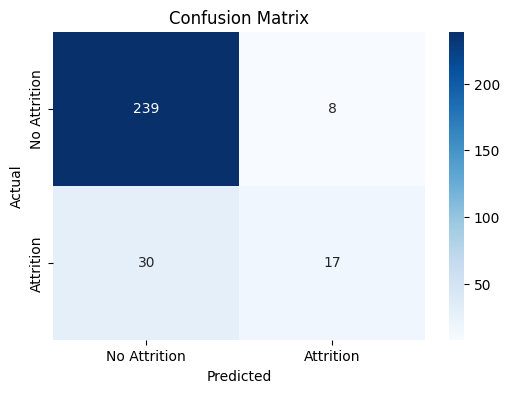

Accuracy Score: 87.07%

Classification Report:

              precision    recall  f1-score   support

       False       0.89      0.97      0.93       247
        True       0.68      0.36      0.47        47

    accuracy                           0.87       294
   macro avg       0.78      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294



In [131]:
# Bestes Modell ausgeben
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Vorhersagen mit dem besten Modell
y_pred = best_model.predict(X_test)
# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Darstellung der Confusion Matrix als Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Accuracy Score anschaulicher darstellen
accuracy_percentage = accuracy * 100
print(f"Accuracy Score: {accuracy_percentage:.2f}%")

# Classification Report übersichtlich anzeigen
print("\nClassification Report:\n")
print(report)

In 87% waren die Vorhersagen des Modells korrekt. Allerdings ist dieser Wert trügerisch. Zwar waren 68% der vorhergesagten Kündigungen richtig, doch nur 36% der tatsächlichen Kündigungen wurden erkannt. Das Modell scheint auch nach ausgiebigem Hyperparameter Tuning zu Konservativ zu sein und keine verlässliche Basis für eine Lösung des Problems zu sein. Nur wenige tatsächlich kündigende Mitarbeiter (17) konnten identifiziert werden, während viele ohne vorherige Erkennung kündigen würden (30).

## **XGBoost**

Durch den aufeinander aufbauenden Ensemble-Ansatz stellt XGBoost eine vielversprechendere Variante dar, um genauer Kündigungen vorherzusagen.

In [115]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Feature Engineering
df_xgb = df.copy().drop(columns=["Leaves"]) # Da während der EDA-Phase keine Interpretierbarkeit der Variable "Leaves" hergestellt werden konnte, wird diese entfernt.

# Aufteilen der Variablen in unterschiedliche Skalierungen, um später unterschiedliche Transformationen anwenden zu können
## Auswahl der metrischen Variablen
metric_features = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
## Auswahl der ordinal-skalierten Variablen
ordinal_features = ["BusinessTravel", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "StockOptionLevel", "Higher_Education", "Absenteeism"]
## Auswahl der nominal-skalierten Variablen
nominal_features = ["Department", "Gender","JobRole","MaritalStatus","OverTime","Mode_of_work", "Work_accident", "Source_of_Hire", "Job_mode"]

# Transformation/Label Encoding der ordinal-skalierten Variablen
df_xgb["BusinessTravel"] = df_xgb["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})
df_xgb["JobInvolvement"] = df_xgb["JobInvolvement"].map({1: 0, 2: 1, 3: 2, 4: 3})
df_xgb["JobLevel"] = df_xgb["JobLevel"].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
df_xgb["JobSatisfaction"] = df_xgb["JobSatisfaction"].map({1: 0, 2: 1, 3: 2, 4: 3})
df_xgb["PerformanceRating"] = df_xgb["PerformanceRating"].map({3: 0, 4: 1})
df_xgb["StockOptionLevel"] = df_xgb["StockOptionLevel"].map({0: 0, 1: 1, 2: 2, 3: 3})
df_xgb["Higher_Education"] = df_xgb["Higher_Education"].map({"12th": 0, "Graduation": 1, "Post-Graduation": 2, "PHD": 3})
df_xgb["Absenteeism"] = df_xgb["Absenteeism"].map({0: 0, 1: 1, 2: 2, 3: 3})
## Da wir keine Missing-Werte haben, brauchen wir keine Imputation bei den ordinal-skalierten Variablen

# Transformation der nominal-skalierten Variablen
df_xgb = pd.get_dummies(df_xgb, columns=nominal_features, drop_first=True)

# Aufteilen der Daten in Trainings- und Testdaten
X = df_xgb.drop(columns=["Attrition"])
y = df_xgb["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [15,16,17,20,21,22], # Anzahl der Bäume
    'max_depth': [6,7,8,9,10,11,12,13,14], # Maximale Tiefe der Bäume
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], # Lernrate
}

# Grid Search
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, scale_pos_weight=6), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [15, 16, 17, 20, 21, 22]},
             scoring='accuracy')

In [116]:
# Bestes Modell ausgeben
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

best_params

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 22}

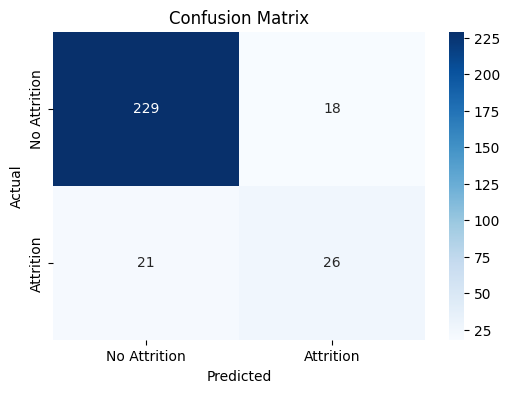

Accuracy Score: 86.73%

Classification Report:

              precision    recall  f1-score   support

       False       0.92      0.93      0.92       247
        True       0.59      0.55      0.57        47

    accuracy                           0.87       294
   macro avg       0.75      0.74      0.75       294
weighted avg       0.86      0.87      0.87       294



In [117]:
# Vorhersagen mit dem besten Modell
y_pred = best_model.predict(X_test)
# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Darstellung der Confusion Matrix als Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Accuracy Score anschaulicher darstellen
accuracy_percentage = accuracy * 100
print(f"Accuracy Score: {accuracy_percentage:.2f}%")

# Classification Report übersichtlich anzeigen
print("\nClassification Report:\n")
print(report)

Mithilfe des XGBoost Verfahrens können die False Negatives drastisch Reduziert werden. Nur noch 45% der tatsächlichen Kündigungen werden nicht erkannt (im Vergleich zu Random Forest mit 64% nicht erkannten Kündigungen). Gleichzeitig bleibt die Genauigkeit stabil bei 87% - wie bei Random Forest. 

<Axes: title={'center': 'Feature Importance (Weight)'}, xlabel='F score', ylabel='Features'>

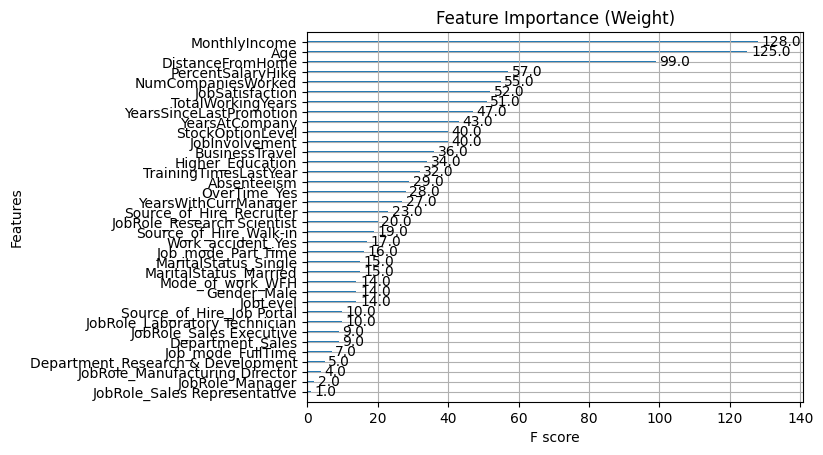

In [108]:
xgb.plot_importance(best_model, importance_type='weight', title="Feature Importance (Weight)")

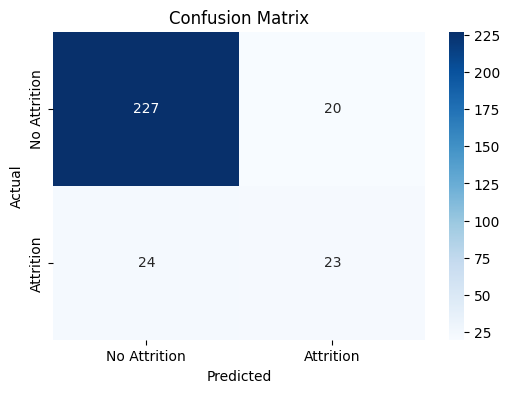

Accuracy Score: 85.03%

Classification Report:

              precision    recall  f1-score   support

       False       0.90      0.92      0.91       247
        True       0.53      0.49      0.51        47

    accuracy                           0.85       294
   macro avg       0.72      0.70      0.71       294
weighted avg       0.85      0.85      0.85       294



In [138]:
cols_with_low_imp = ["Higher_Education", "Department", "Source_of_Hire", "Job_mode"]


# Feature Engineering
df_xgb = df.copy().drop(columns=["Leaves"] + cols_with_low_imp) # Da während der EDA-Phase keine Interpretierbarkeit der Variable "Leaves" hergestellt werden konnte, wird diese entfernt.

# Aufteilen der Variablen in unterschiedliche Skalierungen, um später unterschiedliche Transformationen anwenden zu können
## Auswahl der metrischen Variablen
metric_features = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
## Auswahl der ordinal-skalierten Variablen
ordinal_features = ["JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "StockOptionLevel", "Absenteeism", "BusinessTravel"]
## Auswahl der nominal-skalierten Variablen
nominal_features = ["JobRole","OverTime","Work_accident", "Mode_of_work", "MaritalStatus", "Gender"]

# Transformation/Label Encoding der ordinal-skalierten Variablen
df_xgb["BusinessTravel"] = df_xgb["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})
df_xgb["JobInvolvement"] = df_xgb["JobInvolvement"].map({1: 0, 2: 1, 3: 2, 4: 3})
df_xgb["JobLevel"] = df_xgb["JobLevel"].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
df_xgb["JobSatisfaction"] = df_xgb["JobSatisfaction"].map({1: 0, 2: 1, 3: 2, 4: 3})
df_xgb["PerformanceRating"] = df_xgb["PerformanceRating"].map({3: 0, 4: 1})
df_xgb["StockOptionLevel"] = df_xgb["StockOptionLevel"].map({0: 0, 1: 1, 2: 2, 3: 3})
df_xgb["Absenteeism"] = df_xgb["Absenteeism"].map({0: 0, 1: 1, 2: 2, 3: 3})
## Da wir keine Missing-Werte haben, brauchen wir keine Imputation bei den ordinal-skalierten Variablen

# Transformation der nominal-skalierten Variablen
df_xgb = pd.get_dummies(df_xgb, columns=nominal_features, drop_first=True)

# Aufteilen der Daten in Trainings- und Testdaten
X = df_xgb.drop(columns=["Attrition"])
y = df_xgb["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [8,9,10,11,12,13,14,15,16], # Anzahl der Bäume
    'max_depth': [6,7,8,9,10,11,12,13,14], # Maximale Tiefe der Bäume
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], # Lernrate
}

# Grid Search
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, scale_pos_weight=6), param_grid, cv=3, scoring='accuracy', n_jobs=-1) # Gewichtung auf Grund der unbalancierten Klassen - 16% Attrition, 84% No Attrition
grid_search.fit(X_train, y_train)

# Bestes Modell ausgeben
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Vorhersagen mit dem besten Modell
y_pred = best_model.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Darstellung der Confusion Matrix als Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Accuracy Score anschaulicher darstellen
accuracy_percentage = accuracy * 100
print(f"Accuracy Score: {accuracy_percentage:.2f}%")

# Classification Report übersichtlich anzeigen
print("\nClassification Report:\n")
print(report)

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 16}